[A Survey of Transformers](https://arxiv.org/pdf/2106.04554.pdf)

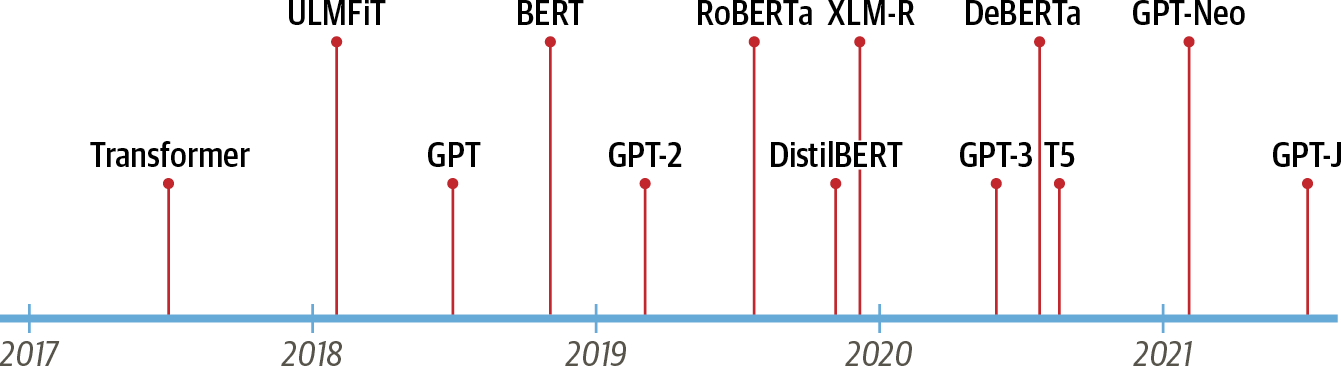
The transformers timeline  

The two of today's most well-known transformers: 
* the Generative Pretrained Transformers(GPT)
* Bidirectional Encoder Representations from Trandormers (BERT)
> ULMFiT showed that training long short-term memory (LSTM) networks on a very large and diverse corpus could **produce state-of-the-art text classifiers with little labeled data**.These advances were the catalysts for GPT and BERT

# The Encoder-Decoder Framework
 [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

## The encoder-decoder atchitecture in RNN 
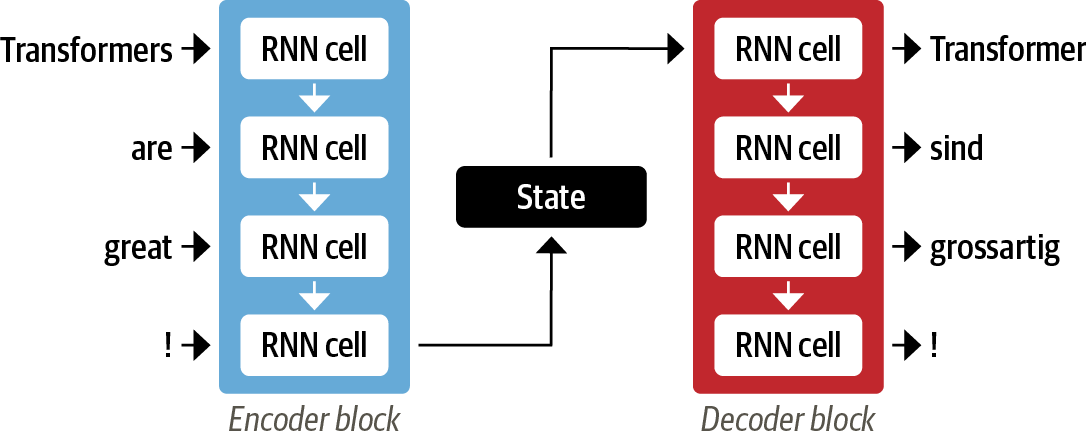
The English sentence "Transformers are great!" is encoded as a hidden state vector that is then decoded to produce the German translation "Transformer sind grossartig!"

## The weakness of this architecture
* The final hidden state of the encoder creates an *information bottleneck*: it has to **represent the meaning of the whole input sequence** because this is all the decoder has access to when generating the output. This is **especially challenging for long sequences**, where information at the start of the sequence might be lost in the process of compressing everything to a single, fixed representation.
> *attention* mechanism is designed to solve this problem. Although it is first used in RNN, it also the main builing blocks of the Transformer architecture.

# Attention Mechanisms

### Fine-tuning method base on pretrained big model
[Universal Language Model Fine-tuning for Text Classification](https://paperswithcode.com/paper/universal-language-model-fine-tuning-for-text)

**Main Idea**:
1. The main idea behind attention: the encoder outputs a hidden state at each step the decoder can access